<a href="https://colab.research.google.com/github/RCML2016/TimeSeriesAnalysisforElectricConsumption/blob/master/TimeSeriesAnalysisforElectricConsumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
#Step01-Importing All the Necessary Libararies and Packaes
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') ## 'FiveThirtyEight' is a special style template for matplotlib, highly useful for visualizing time series data.

from pylab import rcParams
rcParams['figure.figsize'] = 10, 7

import warnings
warnings.filterwarnings('ignore')


In [66]:
#Step02
df_RawData=pd.read_csv('https://github.com/RCML2016/TimeSeriesAnalysisforElectricConsumption/blob/master/Electric_Production.csv?raw=true',sep=',')
#df_RawData.head(10)
df_RawData.tail(10)
#df_RawData.info()
#df_RawData.count()

,DATE,Value
387,04-01-2017,88.3530
388,05-01-2017,92.0805
389,06-01-2017,102.1532
390,07-01-2017,112.1538
391,08-01-2017,108.9312
392,09-01-2017,98.6154
393,10-01-2017,93.6137
394,11-01-2017,97.3359
395,12-01-2017,114.7212
396,01-01-2018,129.4048


#Step03:Defining column names, drop nulls, convert Date to DateTime format and make Date as an index column because it is not possible to plot the graph without index.

In [67]:
df_RawData.columns=['Date','UnitsConsumed'] #Change the Column Title 
df_RawData.dropna() # Drop The Null Values
df_RawData['Date']=pd.to_datetime(df_RawData['Date']) #Converting rge Date Column to DateTime Format.
df_RawData.set_index('Date',inplace=True) #Set Date as Index
df_RawData.head(10)

,UnitsConsumed
Date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
1985-06-01,58.0904
1985-07-01,62.6202
1985-08-01,63.2485
1985-09-01,60.5846


#Step04-Visulaing the Data 

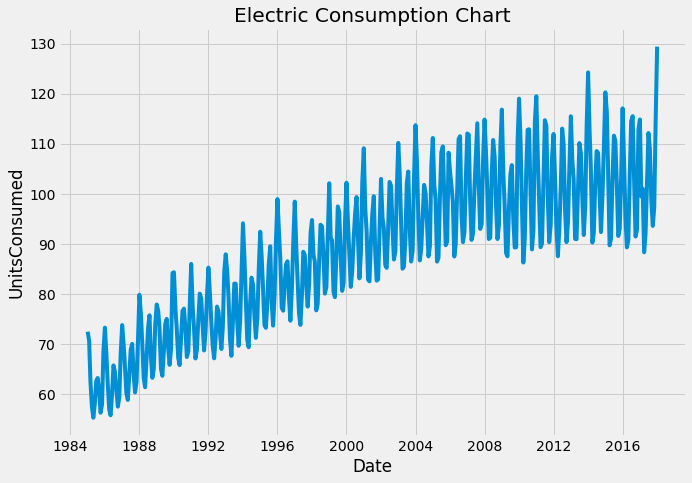

In [68]:
plt.xlabel('Date') 
plt.ylabel('UnitsConsumed')
plt.title('Electric Consumption Chart')
plt.plot(df_RawData)

#Step05-As We know for time series forecasting, a series needs to be stationary. The series should have a constant mean, variance, and covariance.
There are few points to note here, the mean is not constant in this case as we can clearly see an upward trend.

Hence, we have identified that our series is not stationary. We need to have a stationary series to do time series forecasting. In the next stage, we will try to convert this into a stationary series.


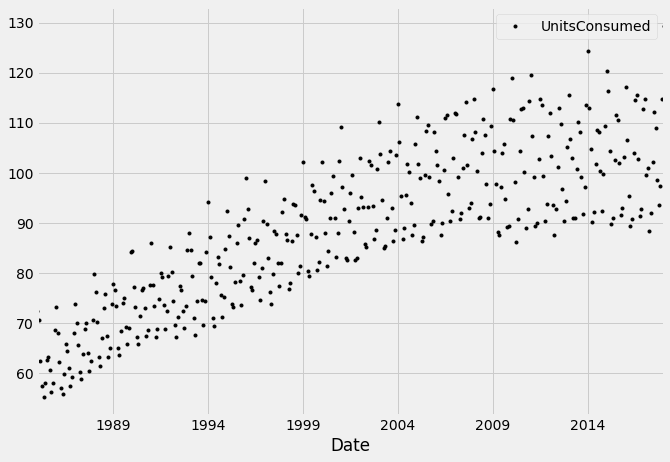

In [69]:
#Lets us plot the scatterplot:

df_RawData.plot(style='k.')
plt.show()

#We can also visualize the data in our series through a distribution too.

Also, a given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.
These components are defined as follows:
Level: The average value in the series.
Trend: The increasing or decreasing value in the series.
Seasonality: The repeating short-term cycle in the series.
Noise: The random variation in the series.
In order to perform a time series analysis, we may need to separate seasonality and trend from our series. The resultant series will become stationary through this process.

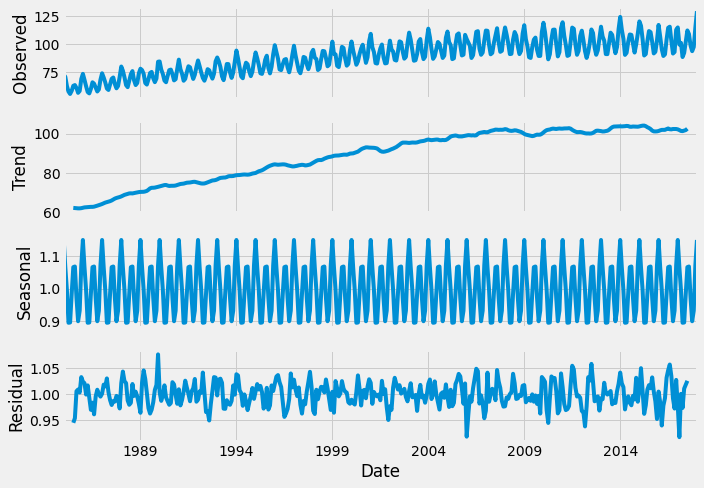

In [70]:
#Step06:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_RawData, model='multiplicative')
result.plot()
plt.show()

**bold text**
Step07: This gives us more insight into our data and real-world actions. Clearly, there is an upward trend and a recurring event where electricity consumption shoots maximum every year.
2. Stationarising the time series.
First, we need to check if a series is stationary or not.
ADF (Augmented Dickey-Fuller) Test
The Dickey-Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test is:
Null Hypothesis: The series has a unit root (value of a =1)
Alternate Hypothesis: The series has no unit root.
If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary (we will understand more about difference stationary in the next section).
If both mean and standard deviation are flat lines(constant mean and constant variance), the series becomes stationary.
The following function is one that can plot a series with its rolling mean and standard deviation.

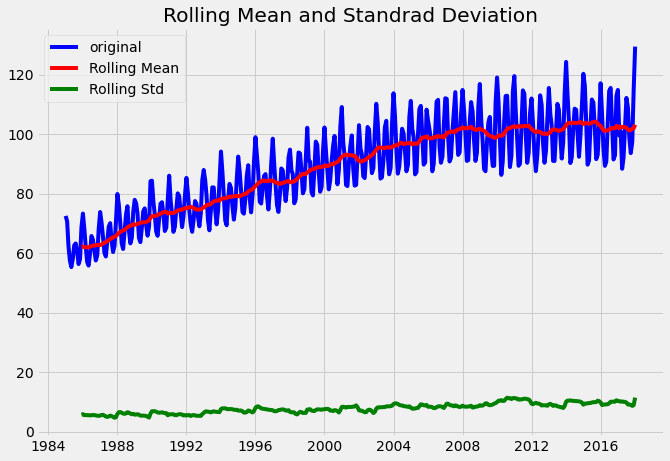

Test Statistics                 -2.256990
p-value                          0.186215
No. of lags used                15.000000
Number of observations used    381.000000
critical value (1%)             -3.447631
critical value (5%)             -2.869156
critical value (10%)            -2.570827
dtype: float64


In [71]:
#Step07:
from statsmodels.tsa.stattools import adfuller

def test_stationary_check(timeseries): #Determining the Rolling Statistics
  rolMean=timeseries.rolling(12).mean()
  rolStd=timeseries.rolling(12).std()
#Plot the Rolling Statistics
  plt.plot(timeseries,color='blue',label='original')
  plt.plot(rolMean,color='red',label='Rolling Mean')
  plt.plot(rolStd,color='green',label='Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean and Standrad Deviation')
  plt.show(block=False)

  #perform dickey fuller test  
  #print('Results of dickey fuller test')
  adft=adfuller(timeseries['UnitsConsumed'],autolag='AIC')#
    #adft =adfuller(timeseries['UnitsConsumed'],autolag='AIC')
  # output for dft will give us without defining what the values are.
  #hence we manually write what values does it explains using a for loop
  output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
  for key,values in adft[4].items():
      output['critical value (%s)'%key] =  values
  print(output)
    
test_stationary_check(df_RawData)

#we can see the increasing mean and standard deviation and hence it is evedent that our series is not stationary.

So We have to remove the Trend and below are the steps follow.

we start by taking a log of the series to reduce the magnitude of the values and reduce the rising trend in the series. 

Then after getting the log of the series, 
find the rolling average of the series. 

A rolling average is calculated by taking 
input for the past 6 months and giving a mean sales value at every point further ahead in series.


We see that the p-value is greater than 0.05 so we cannot reject the Null hypothesis. Also, the test statistics is greater than the critical values. so the data is non-stationary.
To get a stationary series, we need to eliminate the trend and seasonality from the series.
we start by taking a log of the series to reduce the magnitude of the values and reduce the rising trend in the series. Then after getting the log of the series, we find the rolling average of the series. A rolling average is calculated by taking input for the past 12 months and giving a mean consumption value at every point further ahead in series.

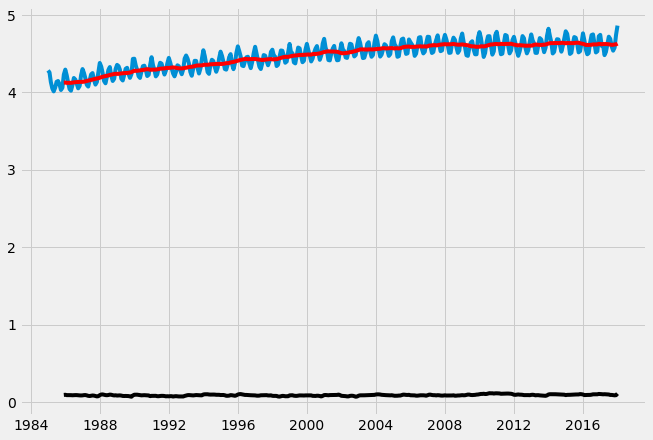

In [72]:
#Step-08:

df_log=np.log(df_RawData)
moving_Avg=df_log.rolling(12).mean()
std_dev=df_log.rolling(12).std()

plt.plot(df_log) # Plotting the Chart for moving Avarage and Std Deviation
plt.plot(moving_Avg,color='red')
plt.plot(std_dev,color='Black')
plt.show()

In [73]:
#Step09: After finding the mean, we take the difference of the series and the mean at every point in the series.
#This way, we eliminate trends out of a series and obtain a more stationary series.

df_log_moving_avg_diff=(df_log)-(moving_Avg)
df_log_moving_avg_diff.dropna(inplace=True)
df_log_moving_avg_diff.head(100)

,UnitsConsumed
Date,
1985-12-01,0.103961
1986-01-01,0.167724
1986-02-01,0.095629
1986-03-01,0.007329
1986-04-01,-0.079115
...,...
1993-11-01,-0.039708
1993-12-01,0.084260
1994-01-01,0.189826


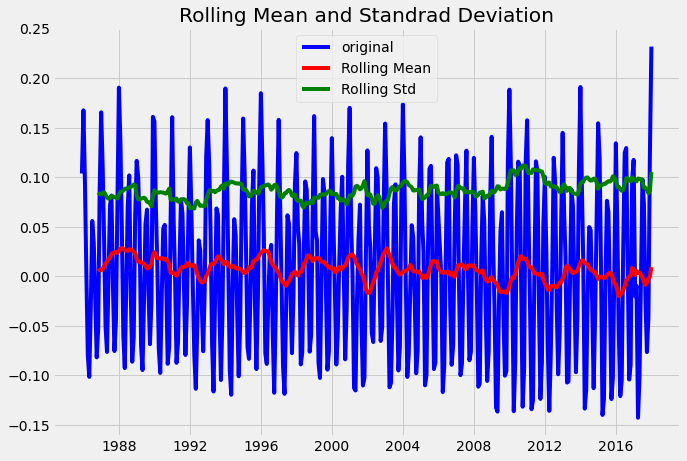

Test Statistics                 -5.211586
p-value                          0.000008
No. of lags used                15.000000
Number of observations used    370.000000
critical value (1%)             -3.448148
critical value (5%)             -2.869383
critical value (10%)            -2.570948
dtype: float64


In [74]:
#step10-Lets Perform the Dickey-Fuller Test (ADFT) once again untill we reach the data stationary point.
test_stationary_check(df_log_moving_avg_diff)

# from the above Graph we can notice that the Data atained stationary.

#step11- Lets measure the Trend of the data with the Help of Wighted Average

In [75]:
weighted_avg=df_log.ewm(halflife=12,min_periods=0,adjust=True).mean()

#The Exponential Moving Average (EMA):
The exponential moving average (EMA) is a weighted average of the last n prices, where the weighting decreases exponentially with each previous price/period. In other words, the formula gives recent prices more weight than past prices.

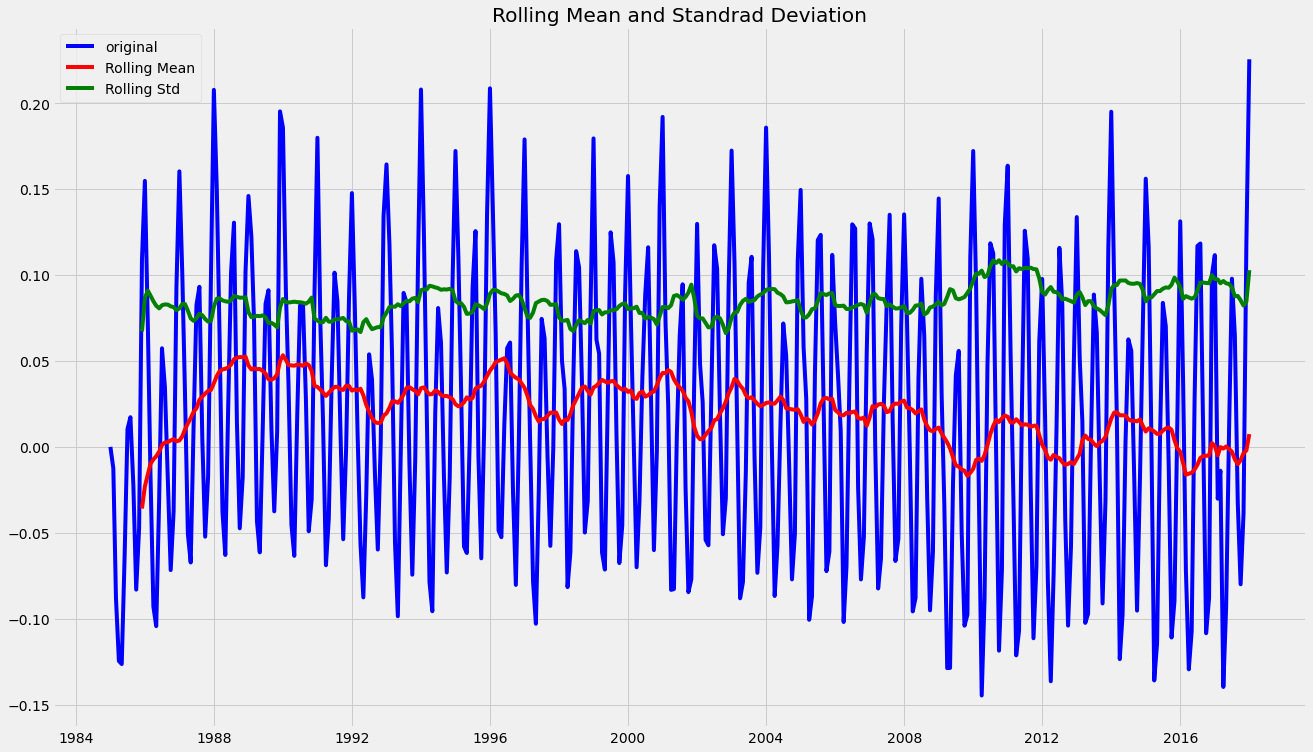

Test Statistics                 -3.251531
p-value                          0.017189
No. of lags used                15.000000
Number of observations used    381.000000
critical value (1%)             -3.447631
critical value (5%)             -2.869156
critical value (10%)            -2.570827
dtype: float64


In [76]:
#Previously we subtracted df_log with moving average, now take the same df_log and subtract with weighted_average and perform the Dickey-Fuller test (ADFT) once again.
logScale_wgtMean=df_log-weighted_avg 

from pylab import rcParams
rcParams['figure.figsize']=20,12


test_stationary_check(logScale_wgtMean)

From the above graph, we observed that the data attained stationarity. We also see that the test statistics and critical value is relatively equal.
There can be cases when there is a high seasonality in the data. In those cases, just removing the trend will not help much. We need to also take care of the seasonality in the series. One such method for this task is differencing.
Differencing is a method of transforming a time series dataset.
It can be used to remove the series dependence on time, so-called temporal dependence. This includes structures like trends and seasonality. Differencing can help stabilize the mean of the time series by removing changes in the level of a time series, and so eliminating (or reducing) trend and seasonality.
Differencing is performed by subtracting the previous observation from the current observation.

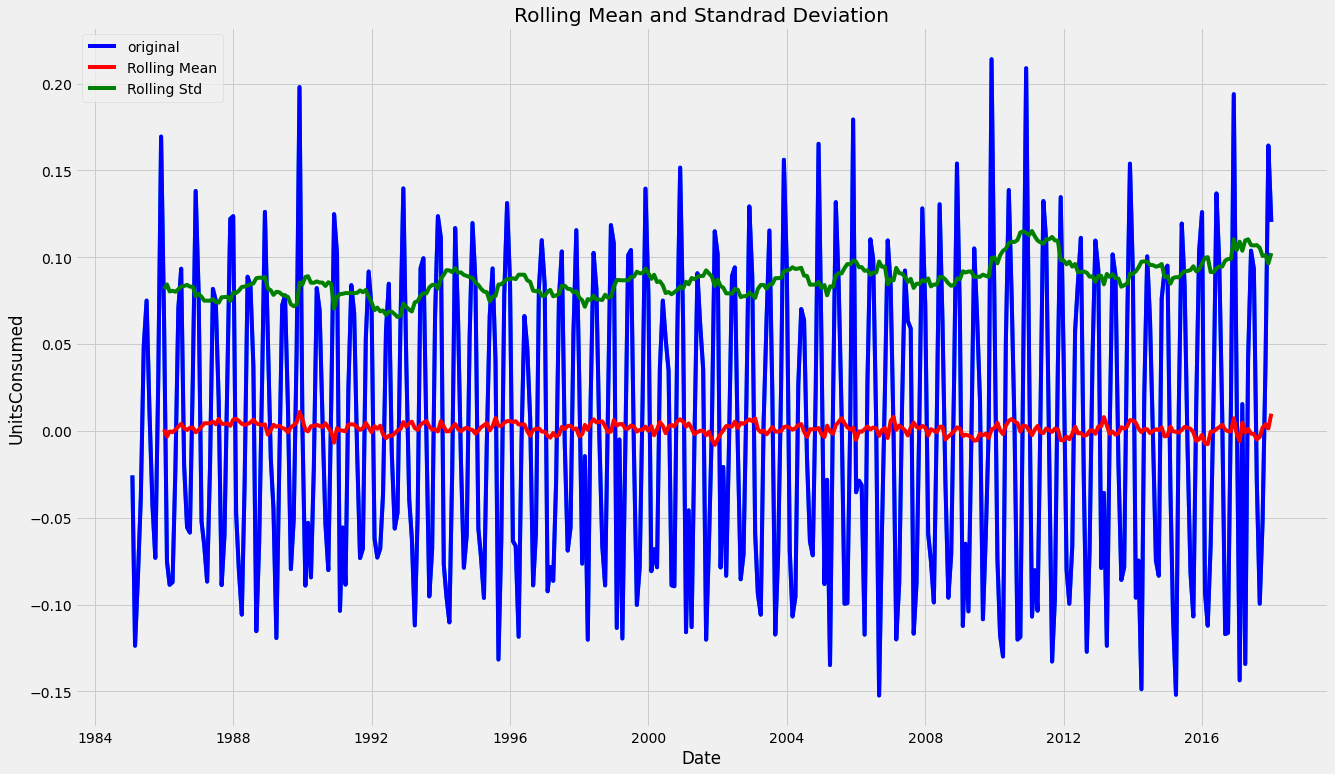

Test Statistics               -6.748333e+00
p-value                        2.995161e-09
No. of lags used               1.400000e+01
Number of observations used    3.810000e+02
critical value (1%)           -3.447631e+00
critical value (5%)           -2.869156e+00
critical value (10%)          -2.570827e+00
dtype: float64


In [77]:
#Step11-Perform the Differencing 

df_log_diff = df_log - df_log.shift()
plt.title("Shifted TimeSeries Chart")
plt.xlabel("Date")
plt.ylabel("UnitsConsumed")
plt.plot(df_log_diff)
#Let us test the stationarity of our resultant series
df_log_diff.dropna(inplace=True)
test_stationary_check(df_log_diff)

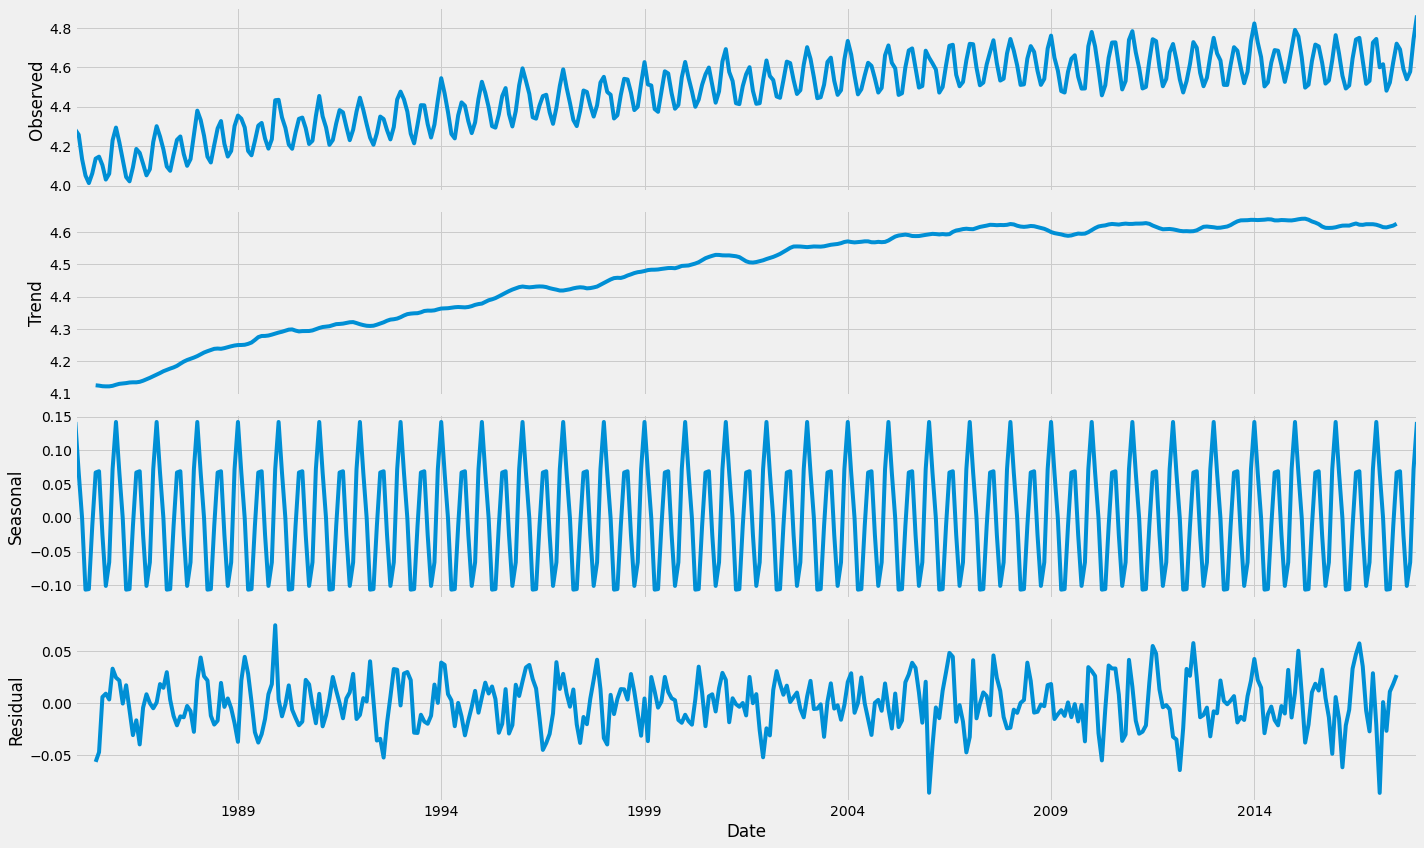

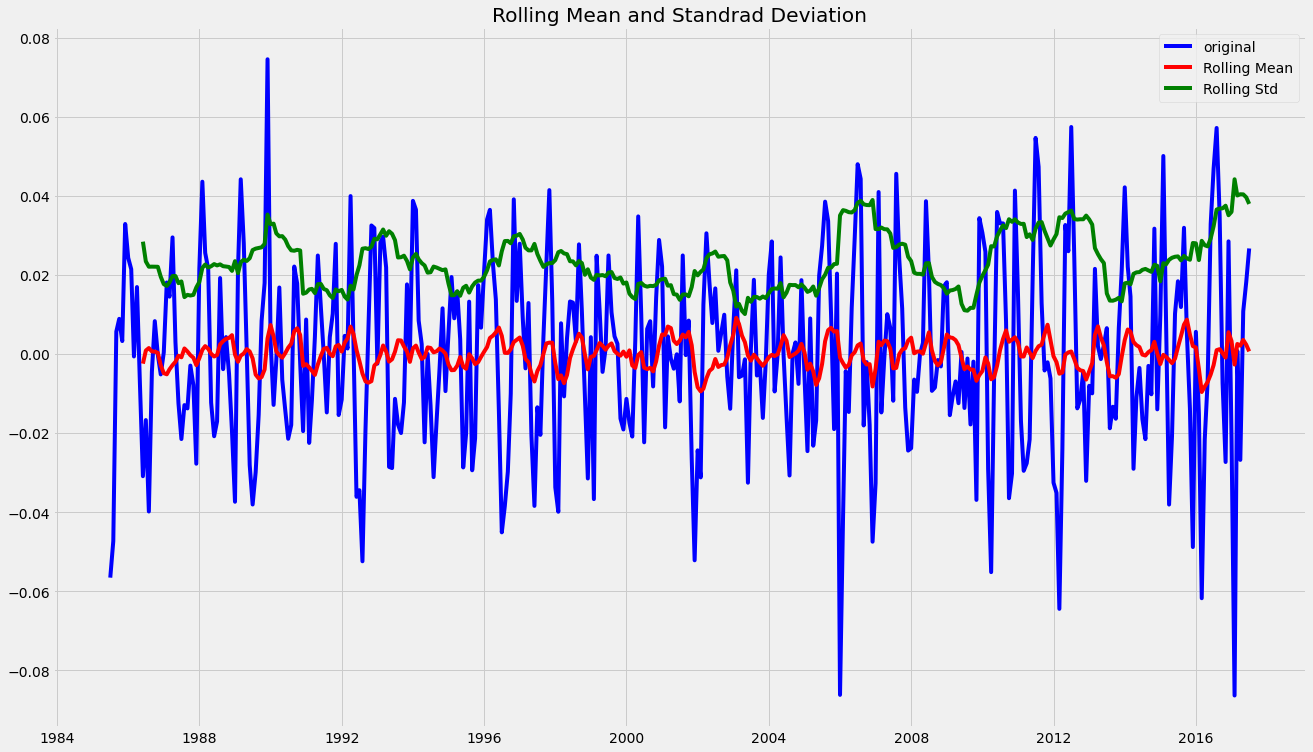

Test Statistics               -1.000311e+01
p-value                        1.861632e-17
No. of lags used               1.400000e+01
Number of observations used    3.700000e+02
critical value (1%)           -3.448148e+00
critical value (5%)           -2.869383e+00
critical value (10%)          -2.570948e+00
dtype: float64


In [78]:
#Step13-The next step is to perform decomposition which provides a structured way of thinking about a time series forecasting problem, both generally in terms of modeling complexity and specifically in terms of how to best capture each of these components in a given model. Finally, perform the Dickey-Fuller test (ADFT) once again.

#from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_log, model='additive', freq = 12)
result.plot()
plt.show()
trend = result.trend
trend.dropna(inplace=True)
seasonality = result.seasonal
seasonality.dropna(inplace=True)
residual = result.resid
residual.dropna(inplace=True)
test_stationary_check(residual)

After the decomposition, if we look at the residual then we have clearly a flat line for both mean and standard deviation. We have got our stationary series and now we can move to find the best parameters for our model.

#Step15-Finding the best parameters for our model
Before we go on to build our forecasting model, we need to determine optimal parameters for our model. For those optimal parameters, we need ACF and PACF plots.
A nonseasonal ARIMA model is classified as an “ARIMA(p,d,q)” model, where:
p → Number of autoregressive terms,
d → Number of nonseasonal differences needed for stationarity, and
q → Number of lagged forecast errors in the prediction equation.
Values of p and q come through ACF and PACF plots. So let us understand both ACF and PACF!
Autocorrelation Function(ACF)
Statistical correlation summarizes the strength of the relationship between two variables. Pearson’s correlation coefficient is a number between -1 and 1 that describes a negative or positive correlation respectively. A value of zero indicates no correlation.
We can calculate the correlation for time series observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.
A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot.
Partial Autocorrelation Function(PACF)
A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.
The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.
The autocorrelation for observation and observation at a prior time step is comprised of both the direct correlation and indirect correlations. It is these indirect correlations that the partial autocorrelation function seeks to remove.
Below code plots, both ACF and PACF plots for us:

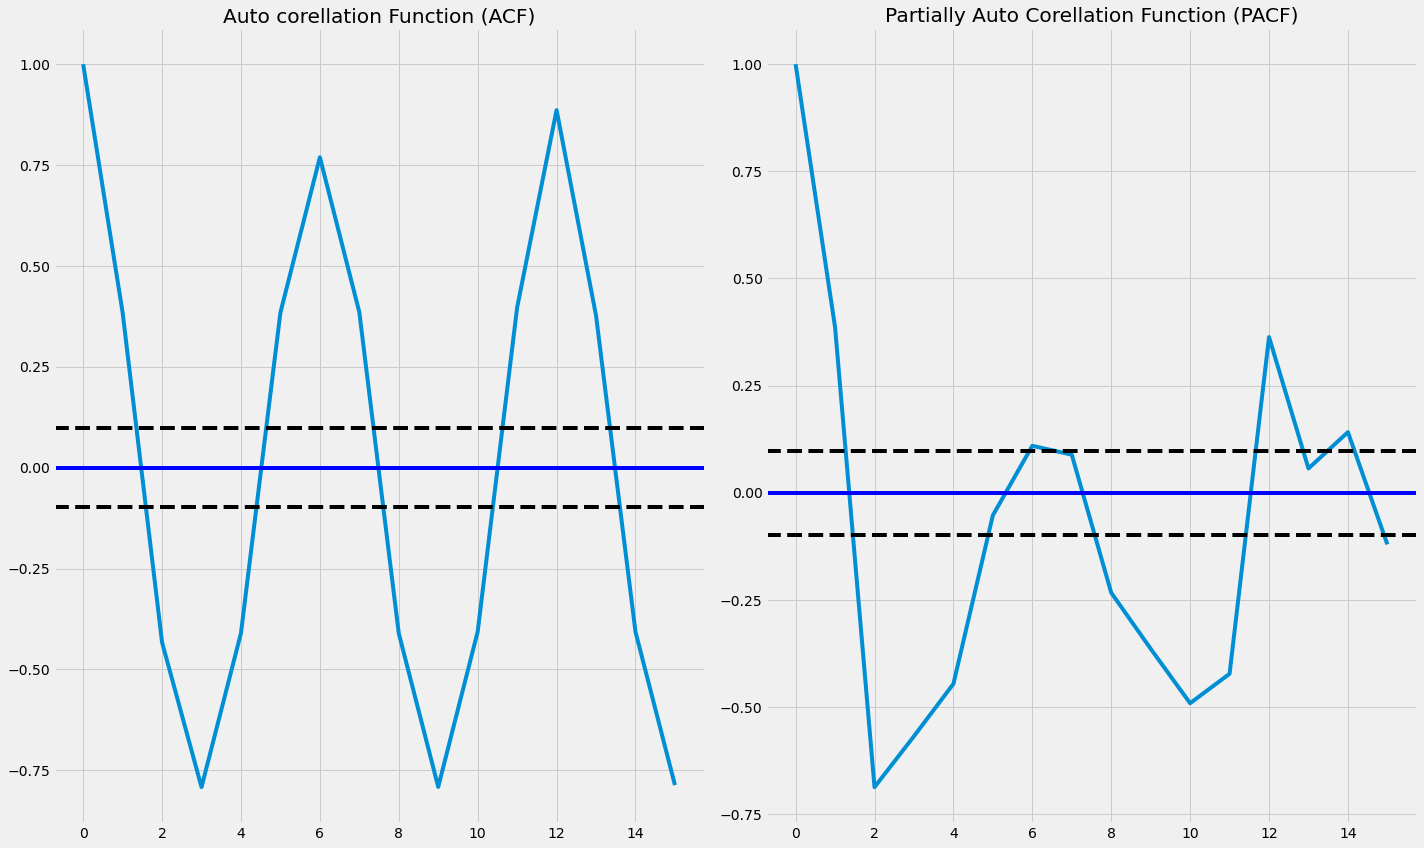

In [79]:
from statsmodels.tsa.stattools import acf,pacf
# we use d value here(data_log_shift)
auto_corre_funct = acf(df_log_diff, nlags=15)
par_auto_Corre_Funct= pacf(df_log_diff, nlags=15,method='ols')

#Plot the Auto Correlation Function (ACF)
plt.subplot(121)
plt.plot(auto_corre_funct) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Auto corellation Function (ACF)')
plt.tight_layout()

#Plot the Partial Auto Correlation Function (PACF) 
plt.subplot(122)
plt.plot(par_auto_Corre_Funct) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Partially Auto Corellation Function (PACF)')
plt.tight_layout()

RSS : 0.522671
RSS : 1.273784
RSS : 0.720743


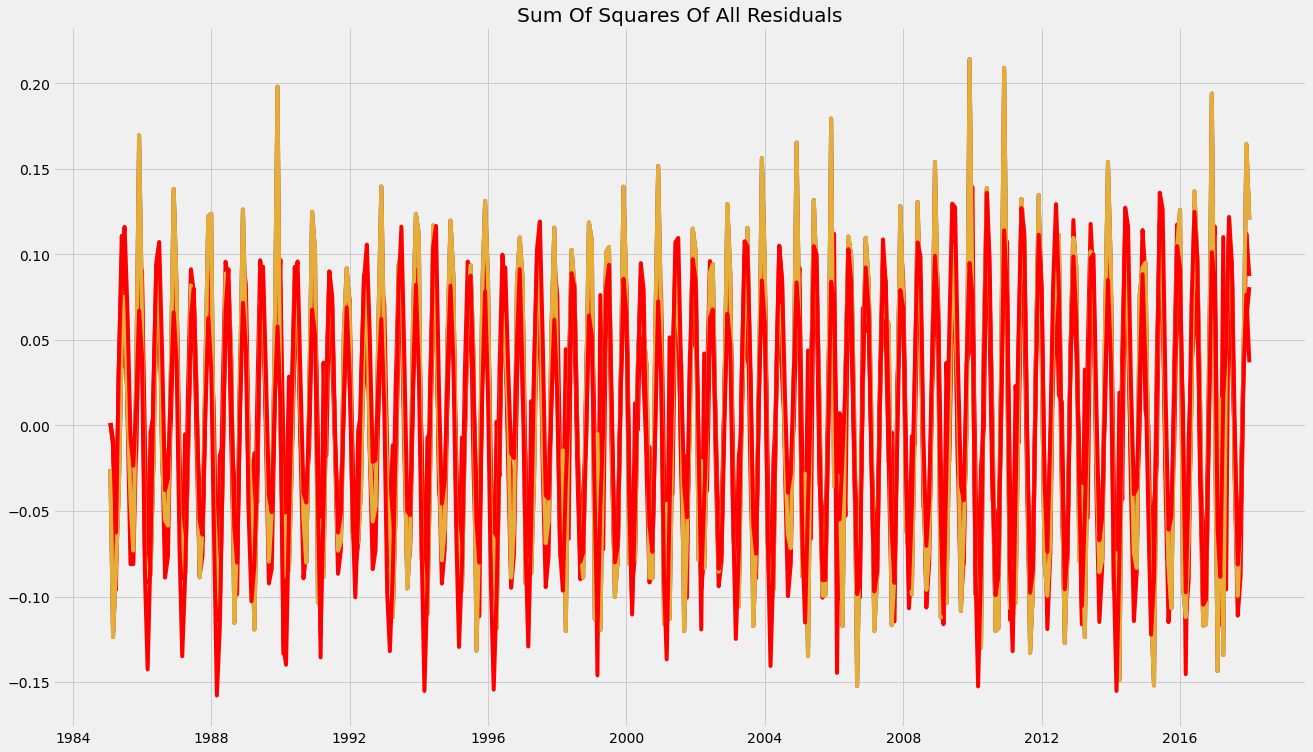

In [80]:
#4. Fitting model
#In order to find the p and q values from the above graphs, we need to check, where the graph cuts off the origin or drops to zero for the first time from the above graphs the p and q values are merely close to 3 where the graph cuts off the origin ( draw the line to x-axis) now we have p,d,q values. So now we can substitute in the ARIMA model and let's see the output.

from statsmodels.tsa.arima_model import ARIMA

model_A = ARIMA(df_log, order=(3,1,3))
result_AR_model_A = model_A = ARIMA(df_log, order=(3,1,3)).fit(disp = 0)
plt.plot(df_log_diff)
plt.plot(result_AR_model_A.fittedvalues, color='red')
plt.title("Sum Of Squares Of All Residuals")
print('RSS : %f' %sum((result_AR_model_A.fittedvalues-df_log_diff["UnitsConsumed"])**2))

model_B = ARIMA(df_log, order=(2,1,0))
result_AR_model_B = model_B.fit(disp = 0)
plt.plot(df_log_diff)
plt.plot(result_AR_model_B.fittedvalues, color='red')
plt.title("Sum Of Squares Of All Residuals")
print('RSS : %f' %sum((result_AR_model_B.fittedvalues-df_log_diff["UnitsConsumed"])**2))

model_C = ARIMA(df_log, order=(3,1,1))
result_AR_model_C = model_C.fit(disp = 0)
plt.plot(df_log_diff)
plt.plot(result_AR_model_C.fittedvalues, color='red')
plt.title("Sum Of Squares Of All Residuals")
print('RSS : %f' %sum((result_AR_model_C.fittedvalues-df_log_diff["UnitsConsumed"])**2))

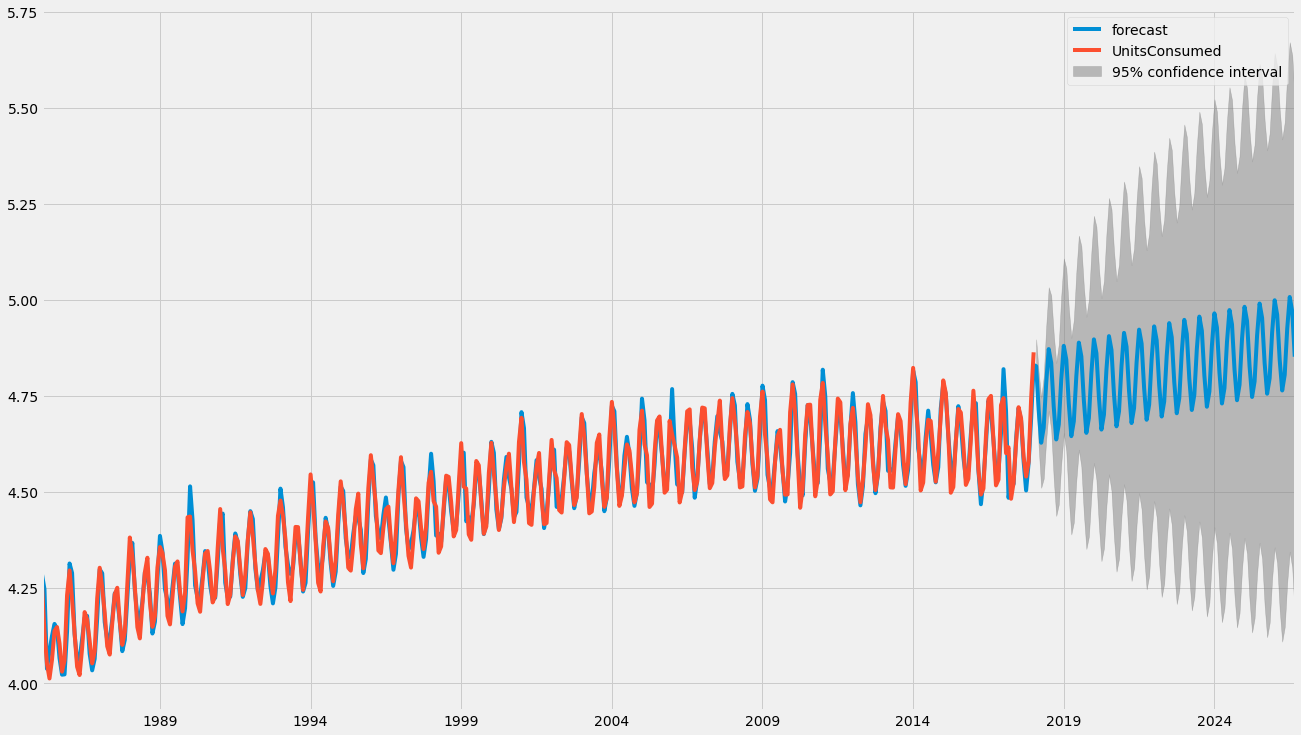

In [81]:
#Step-15 Predictions
#The following code helps us to forecast shampoo sales for the next 6 years.

result_AR_model_A = ARIMA(df_log, order=(3,1,3)).fit(disp = 0).plot_predict(1,500)
x=result_AR_model_A = ARIMA(df_log, order=(3,1,3)).fit(disp = 0).forecast(steps=200)

#Conclusion we calculated the future predictions till 2024.
# The greyed out area is the confidence interval that means the predictions will not cross that area.